In [1]:
import pandas as pd
import os
import re

In [3]:
# read data from the csv file (from the location it is stored)
Data = pd.read_csv('wikihowSep.csv')

In [4]:
Data.head() #Displaying the first 5 entries of the dataset.

,overview,headline,text,sectionLabel,title
0,So you're a new or aspiring artist and your c...,\nSell yourself first.,"Before doing anything else, stop and sum up y...",Steps,How to Sell Fine Art Online
1,"If you want to be well-read, then, in the wor...",\nRead the classics before 1600.,Reading the classics is the very first thing ...,Reading the Classics,How to Be Well Read
2,So you're a new or aspiring artist and your c...,\nJoin online artist communities.,Depending on what scale you intend to sell yo...,Steps,How to Sell Fine Art Online
3,So you're a new or aspiring artist and your c...,\nMake yourself public.,Get yourself out there as best as you can by ...,Steps,How to Sell Fine Art Online
4,So you're a new or aspiring artist and your c...,\nBlog about your artwork.,"Given the hundreds of free blogging websites,...",Steps,How to Sell Fine Art Online


You can see that there are 5 different headers. The most important headers for the purpose of this project are the headline, overview and text. 

There are already characters that stick out which will need to be removed before training any sort of model. I have explained this in the business requirmenets document which is on GitHub. 

---

### Let's Explore the Dataset

---

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585695 entries, 0 to 1585694
Data columns (total 5 columns):
overview        1583187 non-null object
headline        1585695 non-null object
text            1387290 non-null object
sectionLabel    1583791 non-null object
title           1585694 non-null object
dtypes: object(5)
memory usage: 60.5+ MB


In [7]:
Data.shape

(1585695, 5)

In [8]:
Data.isnull().sum()

overview          2508
headline             0
text            198405
sectionLabel      1904
title                1
dtype: int64

Over 1.5 million entries, although we can see that there are some missing values, especially in the important "text" header. These will need to be taken care of before training.

Text(0.5, 1.0, 'Missing values per Feature')

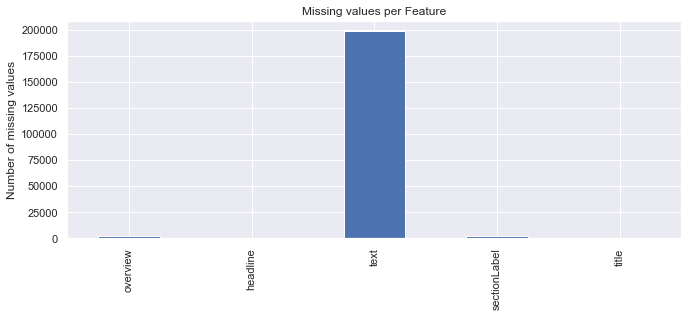

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(Data).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing values per Feature')

As I spoke about above, the overwhelming majoirty of missing values are from the text header. 

### Here is a list of what needs to be done to preprocess the data:

- Use a function to clean and tokenzie the dataset.
- Add a column that represents sentiment within the article.
- Remove, or clean any null values.
- Research the best type of vectorizer that can be used on this data.
- Combine the text sections with their counterparts which can be seen if you look at the sectionLabel section. All labels with the same name should be together.
- No Feature Engineering will need to be completed here, unless I want to fill null values with certain words or paragraphs.
- Sentiment will need to be calculated based upon the text within the original file. 

### Here is an example of data cleaning that I completed on a different NN that was trained to detect sentiment. I will be using parts of this network in this moel.

In [ ]:
def clean_and_tokenize(review):
    text = review.lower()
    
    tokenizer = nltk.TweetTokenizer(reduce_len=True) #This is so that any word that has more than 3 characters repeated in
    #a row get's changed. 
    tokens = tokenizer.tokenize(text)
    
    stemmer = nltk.stem.WordNetLemmatizer()
    text = " ".join(stemmer.lemmatize(token) for token in tokens)
    text = re.sub("[^a-z']"," ", text)
    text = re.sub(r'(.)\1+', r'\1\1', text) #This works on top of the tweettokenzier and it makes repeated characters cap
    #at 2
    text = re.sub(r'\b(\w+)\s+\1\b', r'\1', text) #Delete repeated words, only works for doubles, so 3 will turn to 2
    return text
data["lemmatized_review"] = data["Review"].apply(clean_and_tokenize)

### I will provide a link to the NN that I created for a prior project that focused on predicting sentiment. This will be on GitHub. I believe that I could use the NN to predict sentiment of the articles found within this document.